# Análise

## Introdução

Grafos ponderados não direcionados são uma estrutura de dados fundamental que permite modelar uma variedade de problemas do mundo real. Em um grafo ponderado, cada aresta tem um peso (ou custo, ou distância) associado a ela. Isso permite representar situações em que as relações entre os pontos não são iguais, como a distância entre as cidades em um mapa ou a largura de banda disponível em uma rede de computadores. No contexto de grafos não direcionados, a aresta entre dois nós pode ser percorrida em ambas as direções, sendo ambas equivalentes.

Dentro do estudo de grafos, um conceito fundamental é o de uma árvore geradora mínima (Minimum Spanning Tree - MST). Uma MST de um grafo é uma sub-rede que conecta todos os nós do grafo com o peso mínimo total, ou seja, a soma dos pesos das arestas é a menor possível. As MSTs têm uma ampla gama de aplicações, incluindo a otimização de redes de transporte e comunicação e a previsão de redes elétricas.

O algoritmo de Kruskal é um método popular para encontrar a MST de um grafo. Proposto por Joseph Kruskal em 1956, esse algoritmo funciona adicionando a menor aresta que não forma um ciclo até que todas as vértices estejam conectadas. É eficiente e fácil de implementar, tornando-se uma escolha popular para resolver problemas de otimização em redes.

Outro algoritmo central para a geração de MSTs é o algoritmo de Prim, proposto por Robert C. Prim em 1957. Este algoritmo é uma abordagem "gulosa", começando por um nó arbitrário e sempre adicionando a aresta de menor peso que conecta um nó já na árvore a um nó fora dela. O algoritmo de Prim é particularmente eficiente quando aplicado a grafos densos, onde há muitas arestas.

## Bibliotecas desenvolvidas

Para a presente analise, foi desenvolvido pelo grupo três bibliotecas escritas em **C+** com **bindings** para a linguagem python:

*    **picods**: Biblioteca para visualização de dados em gráficos e tabelas.
*    **pydaa**: Biblioteca para Projeto e analise de algoritmos, que contém as implementações do problema da mochila binária.
*    **pyaon**: Biblioteca auxiliar para a leitura de arquivos de entrada do problema. 

Sendo assim, para instalar essas libs:

In [4]:
!pip install picods pydaa pyaon

E importar as funções utilizadas:

In [5]:
import os
import statistics
from functools import reduce
# plots and tables
from picods import picoplot
from picods import picotable

# File parsing
from pyaon.graph import (dump, load)

# Algorithms
from pydaa.graph import (Graph, kruskal, prim)

## Arquivos de entrada

O diretório `./data` contém todos os arquivos utilizados na analise. Esse diretório contém vários arquivos que representam Grafos ponderados não direcionados.

Cada arquivo tem o nome no formato _Entrada N.txt_, onde _N_ denota a escala do problema, ou seja, a quantidade de vertices do Grafo. Por exemplo, um arquivo `Entrada 10.txt` possui como conteúdo:

```text
10
0 0 0 9 6 9 0 0 0 8 
0 0 1 0 4 5 6 0 0 0 
0 1 0 0 4 0 5 1 2 0 
9 0 0 0 1 7 5 0 4 5 
6 4 4 1 0 5 0 8 7 0 
9 5 0 7 5 0 9 0 3 1 
0 6 5 5 0 9 0 5 5 3 
0 0 1 0 8 0 5 0 0 9 
0 0 2 4 7 3 5 0 0 1 
8 0 0 5 0 1 3 9 1 0 
```

Traduzindo esse arquivo como entrada de uma instância do problema, temos um grafo de 10 vértices com as arestas com os pesos representados em cada célula da matriz. 

## Tratamento dos dados

Dessa forma, aplicando uma série de funções compostas, podemos ler as entradas para cada instância do problema contidas nos arquivos, obtendo assim os dados: **árvore geradora mínima**, **tempo de execução**, e **Número de comparações realizadas** para cada algorítimo:

In [6]:

def median_of_runs(func, graph, n=10):
    results = sorted([func(graph) for _ in range(n)], key=lambda x: (x[1], x[2]))
    exec_median = statistics.median([x[1].microseconds for x in results])
    comparsions_median = statistics.median([x[2] for x in results])
    return (_, exec_median, comparsions_median)

data = list(
    map(
        lambda x: [
            x["size"],
            x["kruskal"][1],
            x["prim"][1],
            x["kruskal"][2],
            x["prim"][2],
        ],
        map(
            lambda x: {
                "size": x[0],
                "kruskal": median_of_runs(kruskal, Graph(x[1])),
                "prim": median_of_runs(prim, Graph(x[1])),
            },
            sorted(
                map(
                    lambda x: load(f"./data/{x}"),
                    os.listdir("data"),
                ),
                key=lambda x: x[0],
            ),
        ),
    )
)



## Analise dos Dados e Discussão

Dessa forma, tendo os dados da resolução de cada instância do problema, podemos prosseguir com a analise desses.

A tabela a seguir mostra, para cada instância do problema, seu tempo de execução e número de comparações obtido, dentro de cada uma das duas abordagens:

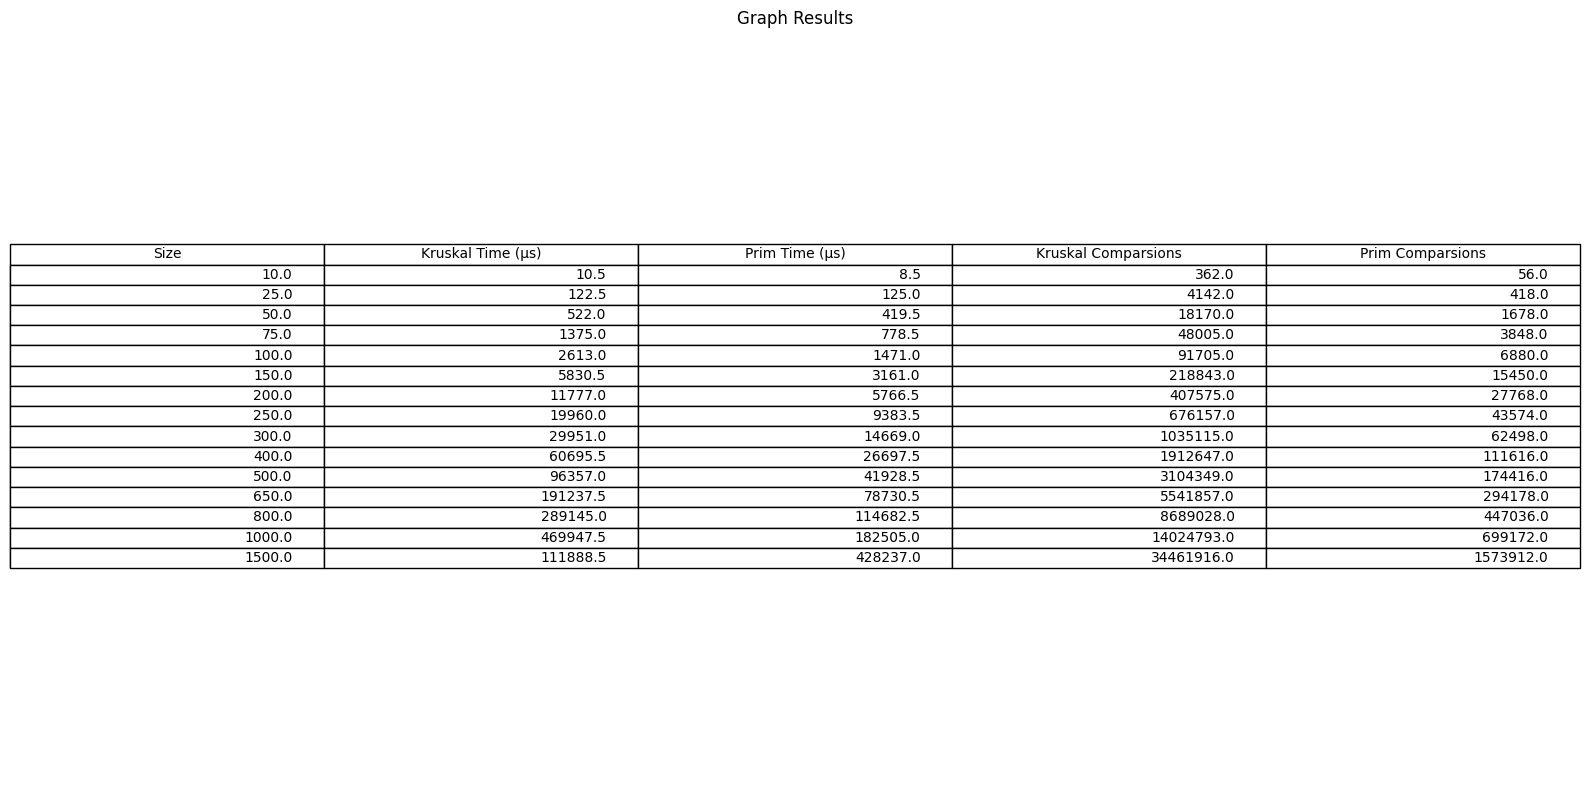

In [7]:
picotable(
    "Graph Results",
    data,
    [
        "Size",
        "Kruskal Time (μs)",
        "Prim Time (μs)",
        "Kruskal Comparsions",
        "Prim Comparsions",
    ],
    ["" for i in range(len(data))],
)


Seguindo, o gráfico de **tempo** x **tamanho** para cada abordagem do problema pode ser visto a seguir: 

### Tempo

#### Kruskal

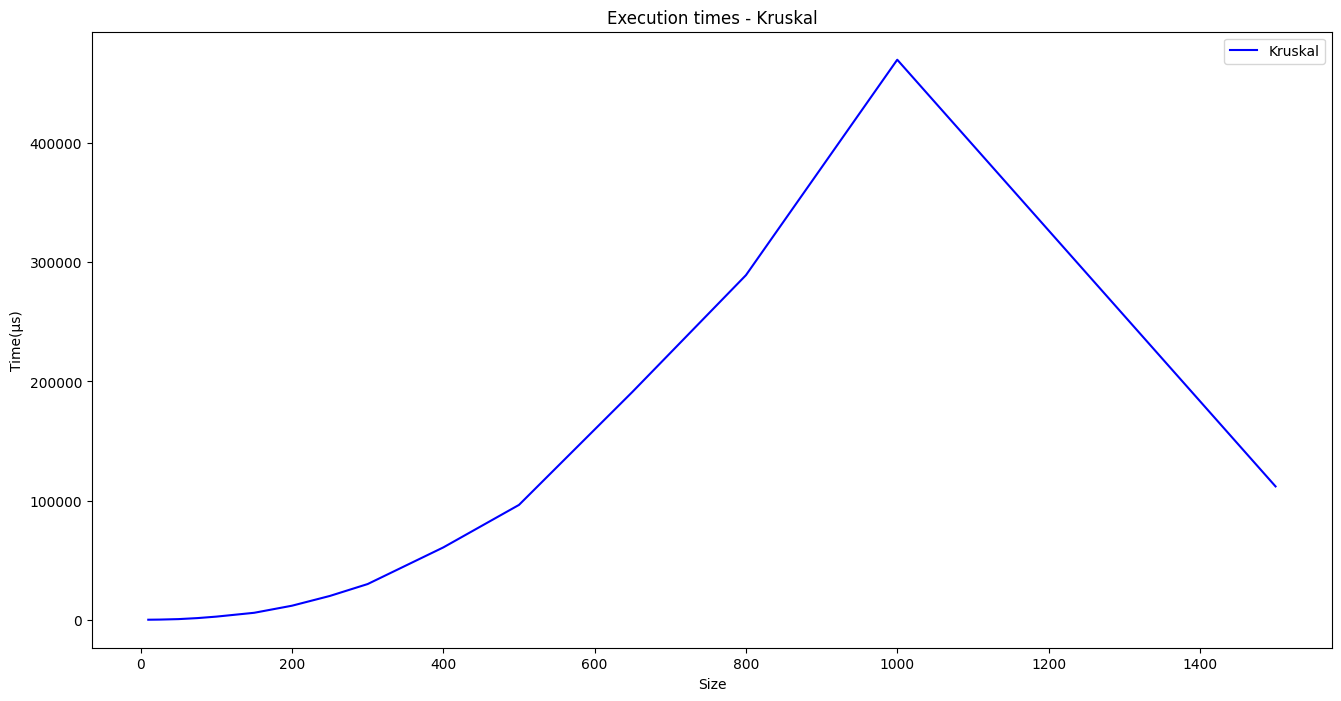

In [8]:
picoplot(
    "Execution times - Kruskal",
    [[i[0] for i in data]],
    [[i[1] for i in data]],
    ["Kruskal"],
    ["blue"],
    "Size",
    "Time(μs)",
)

#### Prim

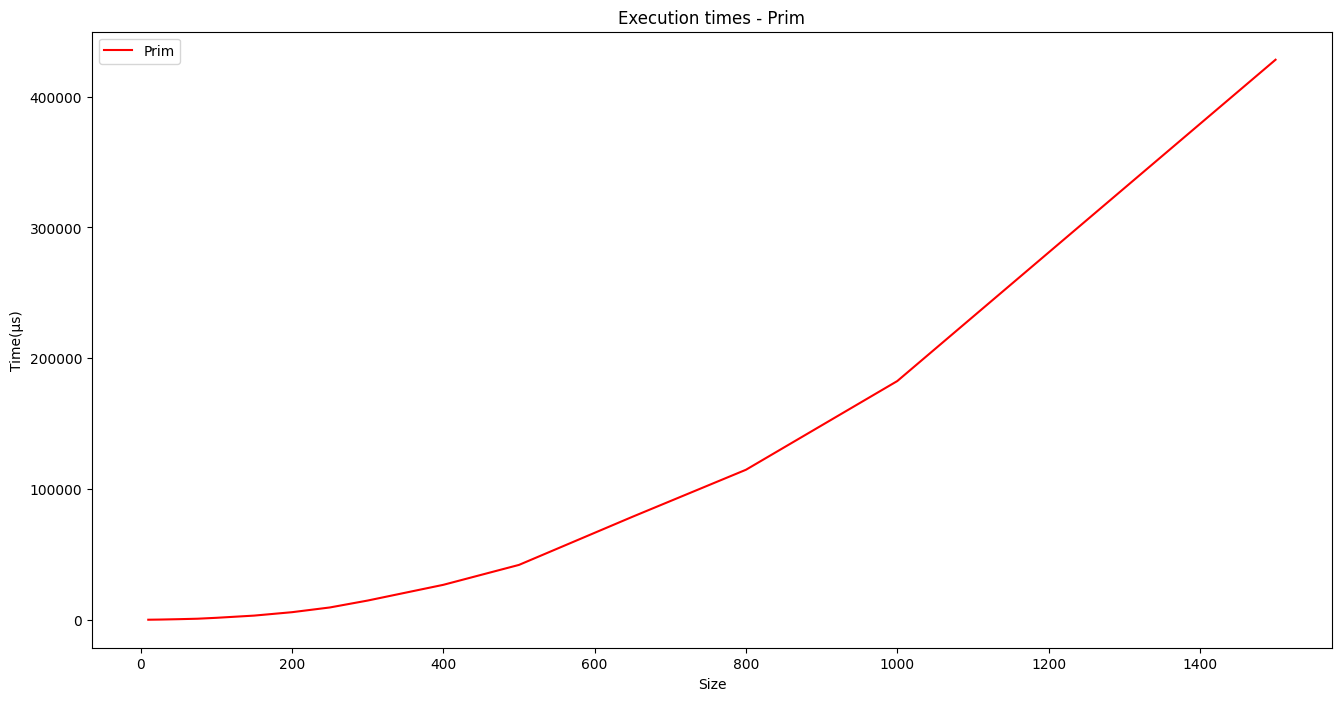

In [9]:
picoplot(
    "Execution times - Prim",
    [[i[0] for i in data]],
    [[i[2] for i in data]],
    ["Prim"],
    ["red"],
    "Size",
    "Time(μs)",
)

### Comparação

### Comparações

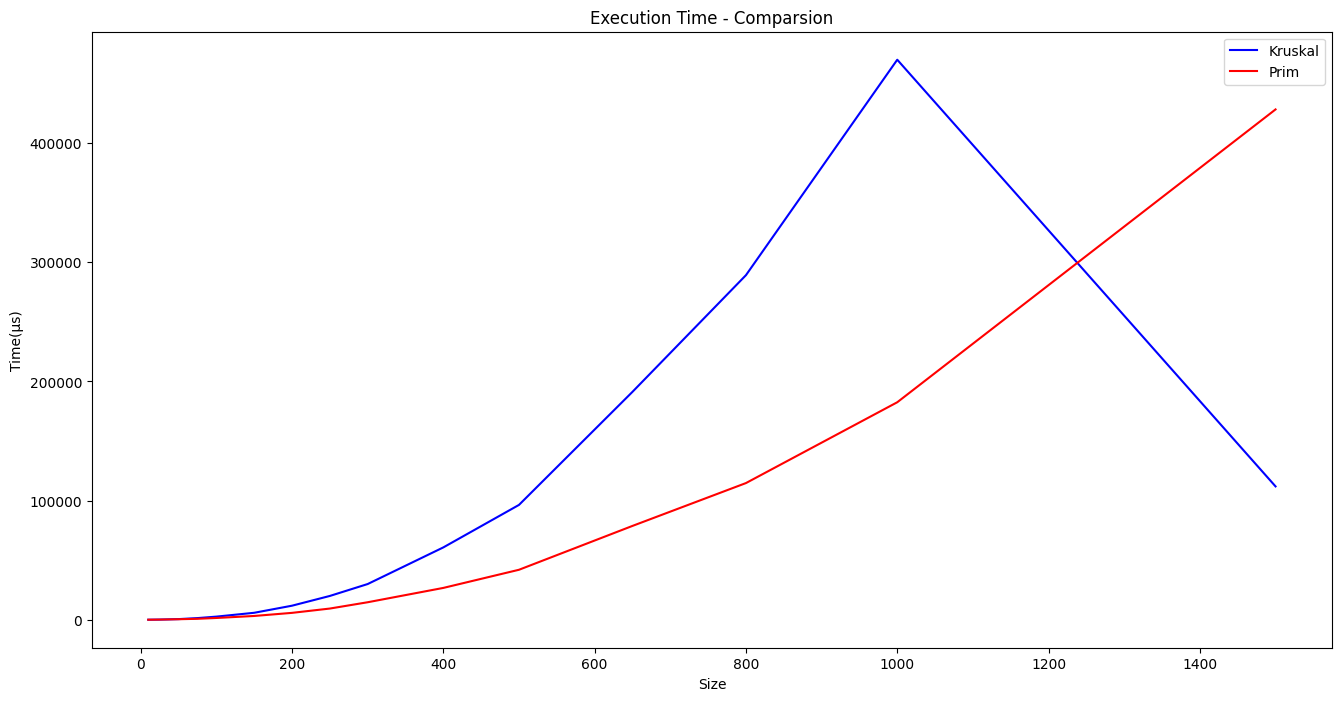

In [10]:
picoplot(
    "Execution Time - Comparsion",
    [[i[0] for i in data], [i[0] for i in data]],
    [
        [i[1] for i in data],
        [i[2] for i in data],
    ],
    ["Kruskal", "Prim"],
    ["blue", "red"],
    "Size",
    "Time(μs)",
)


#### Kruskal

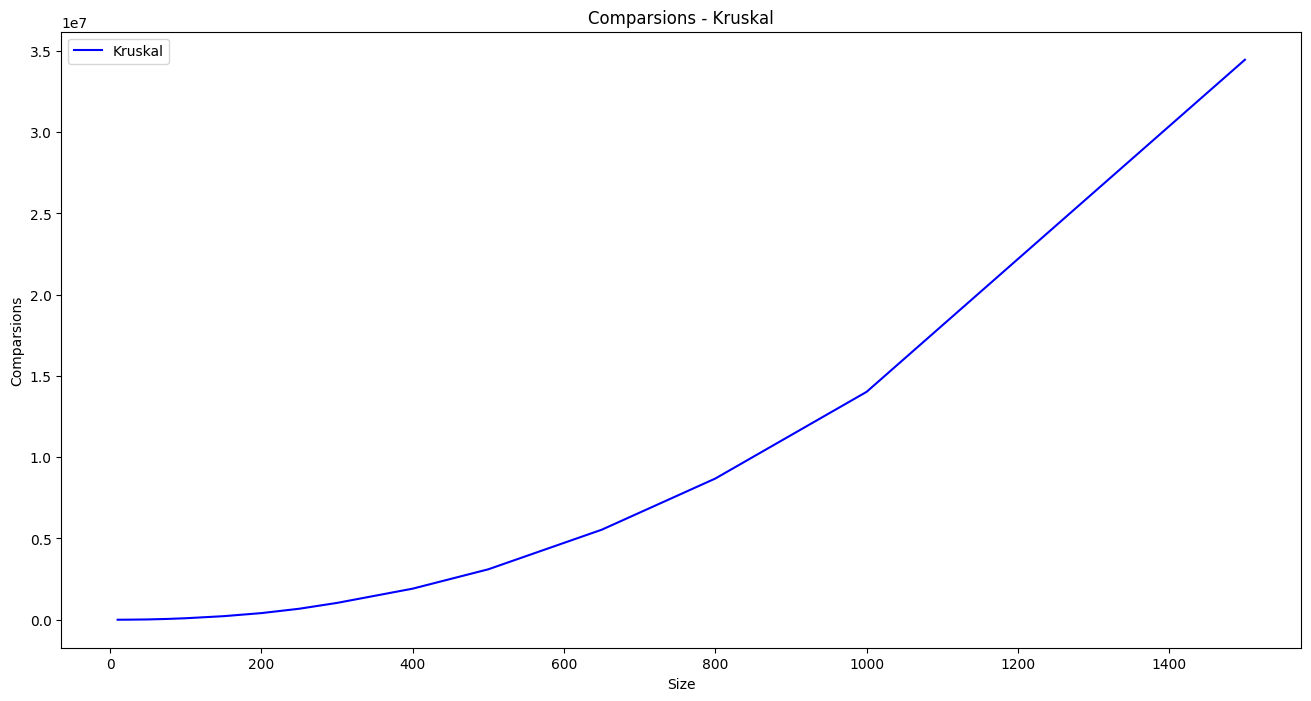

In [11]:
picoplot(
    "Comparsions - Kruskal",
    [[i[0] for i in data]],
    [[i[3] for i in data]],
    ["Kruskal"],
    ["blue"],
    "Size",
    "Comparsions",
)

#### Prim

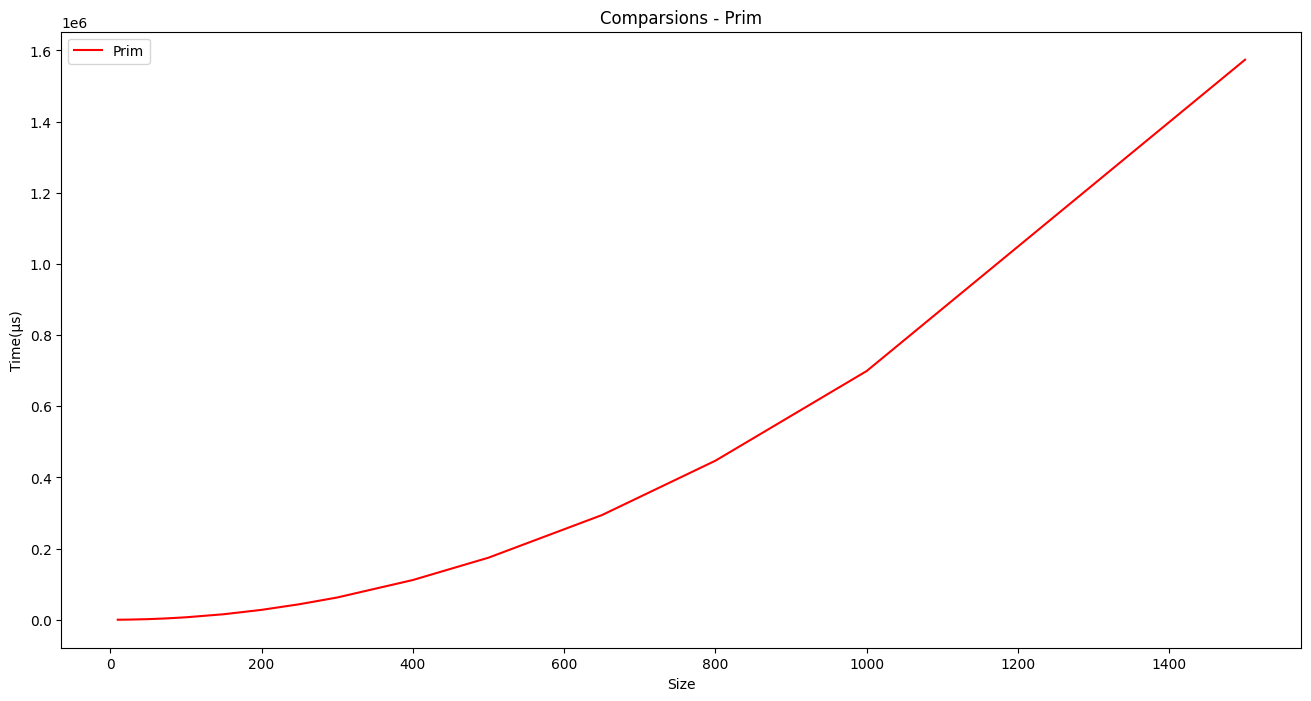

In [12]:
picoplot(
    "Comparsions - Prim",
    [[i[0] for i in data]],
    [[i[4] for i in data]],
    ["Prim"],
    ["red"],
    "Size",
    "Time(μs)",
)

#### Comparação

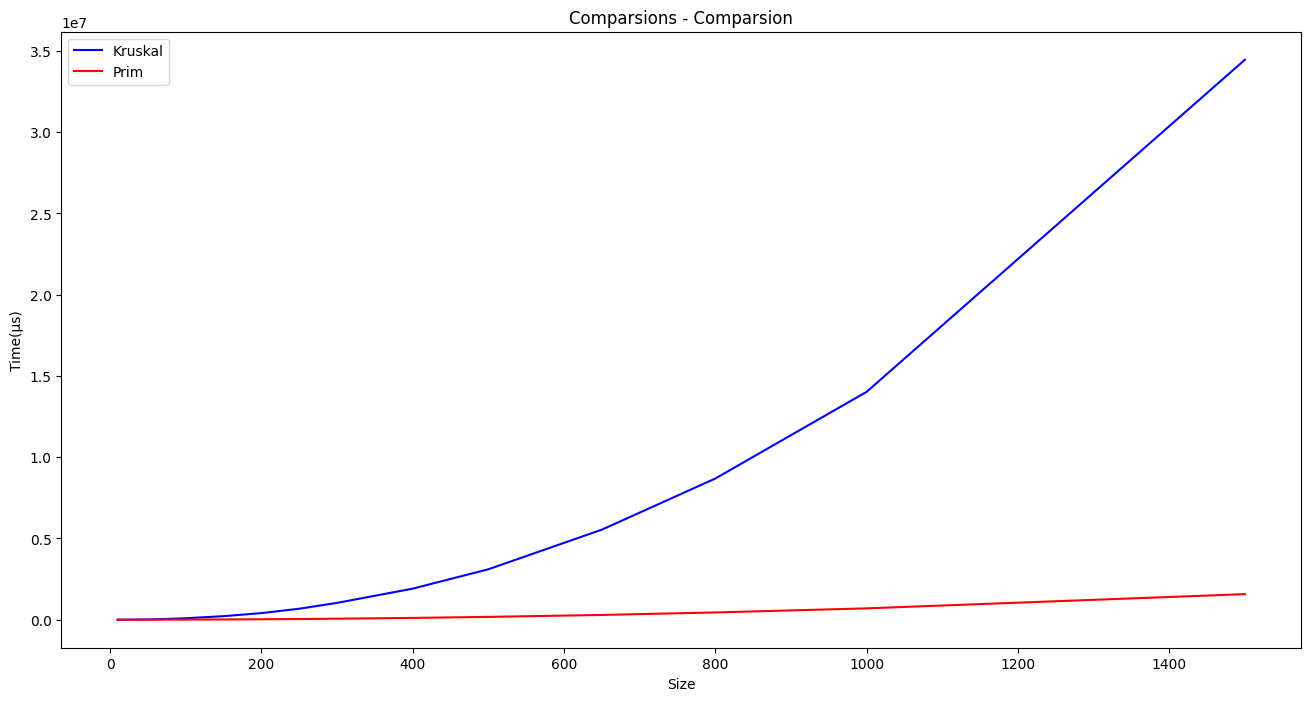

In [13]:
picoplot(
    "Comparsions - Comparsion",
    [[i[0] for i in data], [i[0] for i in data]],
    [
        [i[3] for i in data],
        [i[4] for i in data],
    ],
    ["Kruskal", "Prim"],
    ["blue", "red"],
    "Size",
    "Time(μs)",
)


## Conclusões

Em termos de complexidade computacional, o algoritmo de Kruskal apresenta uma complexidade de O(E log E), onde E é o número de arestas no grafo. Este algoritmo é especialmente eficiente para grafos esparso, pois ele inspeciona as arestas na ordem de seus pesos, permitindo uma conclusão mais rápida se o grafo é esparso. Os gráficos de tempo e comparações apresentados anteriormente neste relatório ilustram claramente essa eficiência.

Por outro lado, o algoritmo de Prim tem uma complexidade de O(V^2), onde V é o número de vértices no grafo. Este algoritmo é mais eficiente em grafos densos, pois inspeciona os vértices e sempre escolhe a aresta de menor peso conectada ao subgrafo corrente, permitindo uma eficácia superior em grafos densos. Os gráficos de tempo e comparações, também mostrados anteriormente, demonstram essa eficácia. Consequentemente, a escolha entre o algoritmo de Kruskal e o algoritmo de Prim deve ser orientada pela densidade do grafo em questão.